## Better crypto libraries

- Uses ECDSA library which was optimized for x86. Compiled C code. Access using a Go interface.
- 40%-45% faster

**Remark**: Go ECDSA does not support key recovery.

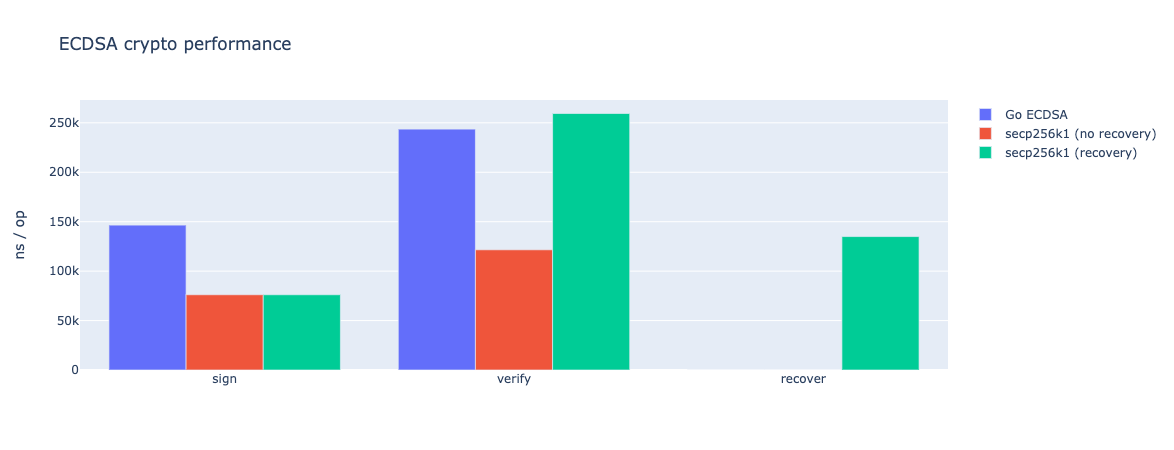

In [25]:
import plotly.graph_objects as go
import numpy as np
import pandas as pd

ops = pd.read_csv("ops.csv")

fig = go.Figure(data=[
    go.Bar(name='Go ECDSA', x=ops["function"], y=ops["goEcdsa"]),
    go.Bar(name='secp256k1 (no recovery)', x=ops["function"], y=ops["secp256k1NoRecovery"]),
    go.Bar(name='secp256k1 (recovery)', x=ops["function"], y=ops["secp256k1Recovery"]),
])
# Change the bar mode
fig.update_layout(title="ECDSA crypto performance", barmode='group', yaxis_title="ns / op")
fig.update_layout(xaxis_type='category', yaxis_type='linear')
fig.show()

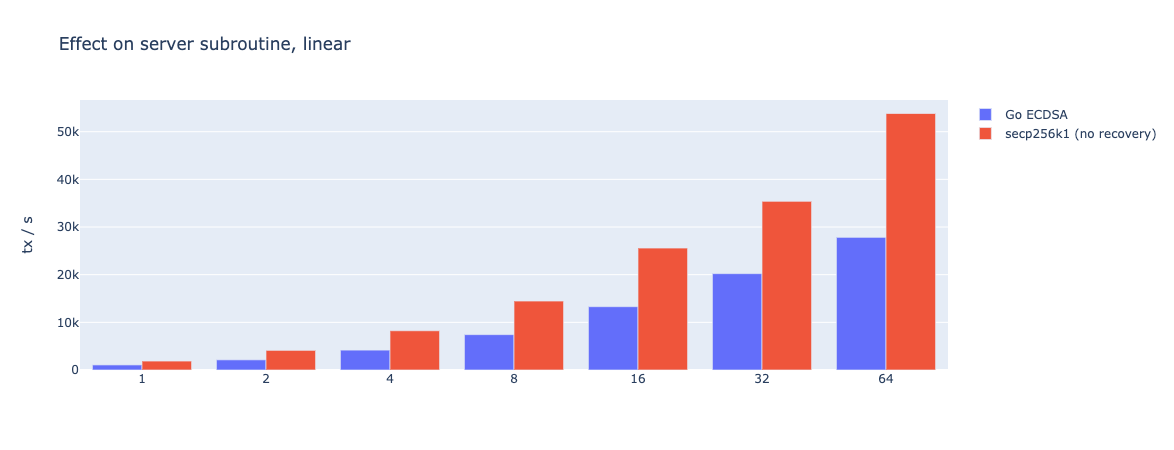

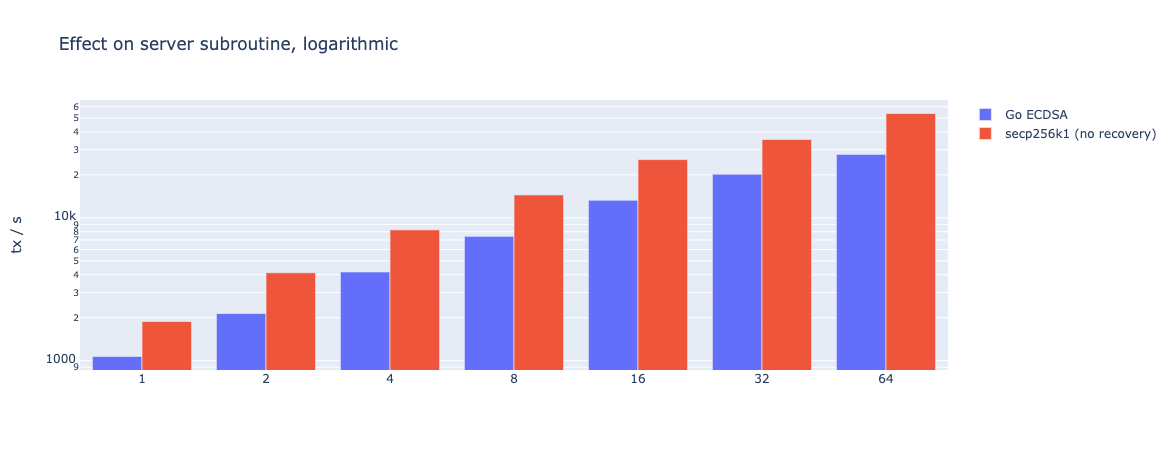

In [29]:
import plotly.graph_objects as go
import numpy as np
import pandas as pd

df0 = pd.read_csv("before.csv")
df1 = pd.read_csv("improved.csv")

fig = go.Figure(data=[
    go.Bar(name='Go ECDSA', x=df0["cpus"], y=1/(df0["nsop"]*10**-9)),
    go.Bar(name='secp256k1 (no recovery)', x=df1["cpus"], y=1/(df1["nsop"]*10**-9))
])
# Change the bar mode
fig.update_layout(title="Effect on server subroutine, linear", barmode='group', yaxis_title="tx / s")
fig.update_layout(xaxis_type='category', yaxis_type='linear')
fig.show()
fig.update_layout(title="Effect on server subroutine, logarithmic", yaxis_type='log')
fig.show()